# 0. Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import correlate2d
from skimage import io, color
from scipy import ndimage

# 1. Convolution vs Correlation

- Convolution is the same as correlation with **a 180° rotated filter kernel**
- Correlation and convolution are identical when the filter kernel is symmetric

<br></br>
### 1-1. **2d Convolution**
$$h[m,n] =  \sum_{k,l}^{}{f[k,l]I[m-k, n-l]}$$
$$h = f*I$$
- communitive: $a*b = b*a$
- associative: $a*(b*c) = (a*b)*c$
- distributes over addition: $a*(b+c) = (a*b)+(a*c)$
- scalars factor out: $ka * b = a * kb = k (a*b)$
- identity: $a*e = a$

<br></br>
### 1-2. **2d Correlation**
$$h[m,n] =  \sum_{k,l}^{}{f[k,l]I[m+k, n+l]}$$
$$h = f\otimes I $$




Input Image


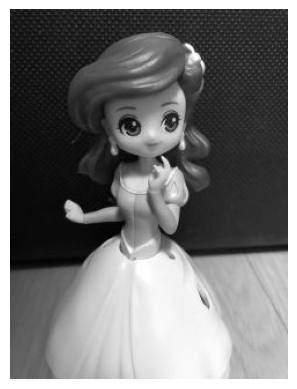

Convolution Result Image - shift right


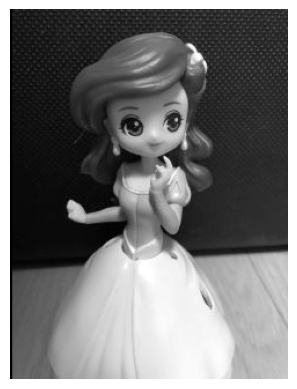

Correlation Result Image - shift left


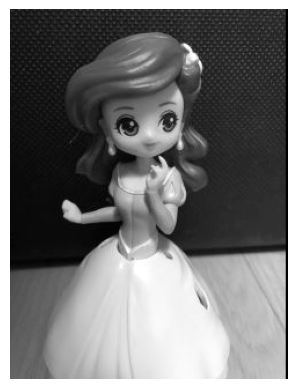

In [3]:
###############################################
# Input Image
###############################################
RGBImage = io.imread('./drive/MyDrive/Computer Vision class/img/TheLittleMermaid1.JPG')
GrayImage = color.rgb2gray(RGBImage)

print('Input Image')
plt.axis('off')
plt.imshow(GrayImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

###############################################
# Convolution
# same as correlation with a 180° rotated filter kernel
###############################################
rightshift = np.array((
        [0,0,0,0,0],
        [0,0,0,0,0],
        [0,0,0,0,1],
        [0,0,0,0,0],
        [0,0,0,0,0]),
        dtype="float")

convo = convolve2d(GrayImage, rightshift, 'same')

print('Convolution Result Image - shift right')
plt.axis('off')
plt.imshow(convo, cmap='gray')
plt.show()

###############################################
# Correlation
###############################################
leftshift = np.array((
        [0,0,0,0,0],
        [0,0,0,0,0],
        [0,0,0,0,1],
        [0,0,0,0,0],
        [0,0,0,0,0]),
        dtype="float")

corr = correlate2d(GrayImage, leftshift, 'same')

print('Correlation Result Image - shift left')
plt.axis('off')
plt.imshow(corr, cmap='gray')
plt.show()

# 2. Linear Filters

##2-1. Box Filter
$$ \frac{1}{25} \begin{pmatrix}
 1 & 1 & 1 & 1 & 1\\
 1 & 1 & 1 & 1 & 1\\
 1 & 1 & 1 & 1 & 1\\
 1 & 1 & 1 & 1 & 1\\
 1 & 1 & 1 & 1 & 1\\
 \end{pmatrix} $$
- smoothing effect (low-pass filter) but little bit vertical / horizontal scratch in result image
- sum to one to make result image as pixel same range compared to previous image

Box Filter Result Image


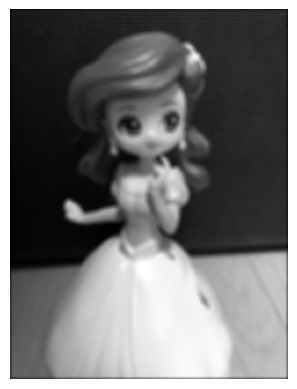

In [4]:
###############################################
# Box Filter
###############################################
box = (1/25) * np.array((
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1]),
        dtype="float")

boxImage = convolve2d(GrayImage, box, 'same')

print('Box Filter Result Image')
plt.axis('off')
plt.imshow(boxImage, cmap='gray')
plt.show()

## 2-2. 🌟 Gaussian Filter
$$ \frac{1}{25} \begin{pmatrix}
 0.003 & 0.0013 & 0.022 & 0.0013 & 0.003\\
 0.0013 & 0.059 & 0.097 & 0.059 & 0.0013\\
 0.022 & 0.097 & 0.159 & 0.097 & 0.022\\
 0.0013 & 0.059 & 0.097 & 0.059 & 0.0013\\
 0.003 & 0.0013 & 0.022 & 0.0013 & 0.003\\
 \end{pmatrix} $$

 - similar to box filter but more smooth
 - weight contributions of neighboring pixels by nearness
 - **Gaussian convolved with Gaussain is another Gaussain**, Convolving twice with Gaussian kernel of width $\sigma$ is same as convolving once with kernel of width $ \sqrt{2}\sigma$
 - **separable kernel**, decompose matrix using SVD and get eigenvector with highest eigenvalue
 - essential when down-sampling images (Gaussian Pyramid)

Gaussian Result Image


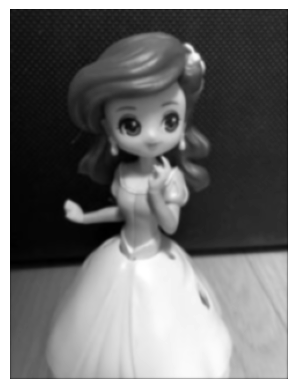

In [5]:
###############################################
# Gaussian Filter
###############################################
gaussian = np.array((
        [0.003, 0.0013, 0.022, 0.0013, 0.003],
        [0.0013,0.059,0.097,0.059,0.0013],
        [0.022,0.097,0.159,0.097,0.022],
        [0.0013,0.059,0.097,0.059,0.0013],
        [0.003,0.0013,0.022,0.0013,0.003]),
        dtype="float")

gaussian_image = convolve2d(GrayImage, gaussian, 'same')

print('Gaussian Result Image')
plt.axis('off')
plt.imshow(gaussian_image, cmap='gray')
plt.show()

## 2-2. Sobel Filter
###x-axis Sobel Filter
$$\begin{pmatrix}
 -1 & 0 & 1\\
 -2 & 0 & 2\\
 -1 & 0 & 1
 \end{pmatrix} $$
###y-axis Sobel Filter
 $$\begin{pmatrix}
 1 & 2 & 1\\
 0 & 0 & 0\\
 -1 & -2 & -1
 \end{pmatrix} $$
- see differences between vertical / horizontal area
- act like a gradient
- (1 2 1) pattern approximates Gaussian using integer mathematics, smooths along edge

Sobel X Result Image


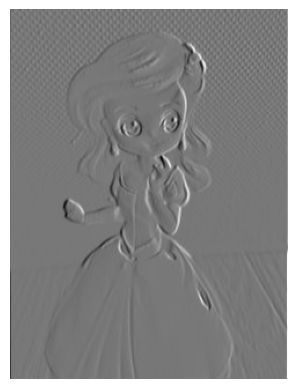

Sobel Y Result Image


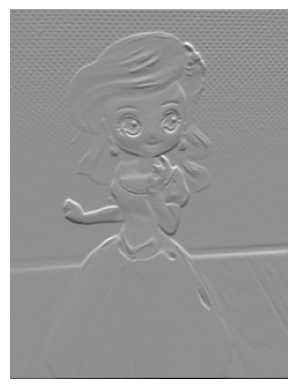

In [6]:
###############################################
# 3x3 x-axis Sobel filter
###############################################
sobelX = np.array((
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]),
        dtype="float")

sobelX_image = convolve2d(GrayImage, sobelX, 'same')

print('Sobel X Result Image')
plt.axis('off')
plt.imshow(sobelX_image, cmap='gray')
plt.show()

###############################################
# 3x3 y-axis Sobel filter
###############################################
sobelY = np.array((
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]),
        dtype="float")

sobelY_image = convolve2d(GrayImage, sobelY, 'same')

print('Sobel Y Result Image')
plt.axis('off')
plt.imshow(sobelY_image, cmap='gray')
plt.show()

##2-3. Sharpening Filter
$$\begin{pmatrix}
 0 & 0 & 0\\
 0 & 2 & 0\\
 0 & 0 & 0
 \end{pmatrix} - \frac{1}{9}\begin{pmatrix}
 1 & 1 & 1\\
 1 & 1 & 1\\
 1 & 1 & 1
 \end{pmatrix}$$
 - accentuates differences with local average
 - sum to one

Sharpening Result Image


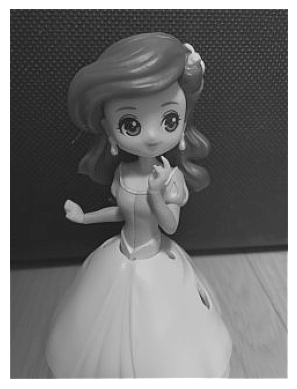

In [7]:
###############################################
# Sharpening Filter
###############################################
sharpening = np.array([
        [-1/9, -1/9, -1/9],
        [-1/9, 17/9, -1/9],
        [-1/9, -1/9, -1/9]],
        dtype="float")

sharpening_image = convolve2d(GrayImage, sharpening, 'same')

print('Sharpening Result Image')
plt.axis('off')
plt.imshow(sharpening_image, cmap='gray')
plt.show()

##2-4. Laplacian of Gaussian (LoG) Filter
- detects 'blobs' in the input image

LoG filter Result Image


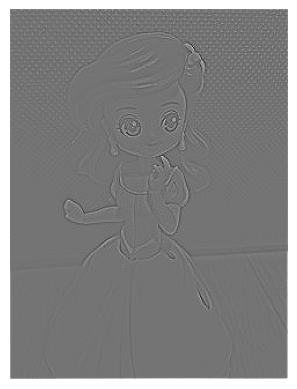

In [8]:
###############################################
# Laplacian of Gaussian (LoG) filter
###############################################
LoG = np.array((
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]),
        dtype="float")

LoGImage = convolve2d(GrayImage, LoG, 'same')

print('LoG filter Result Image')
plt.axis('off')
plt.imshow(LoGImage, cmap='gray')
plt.show()

# 3. Non-Linear Filters
## 3-1. Median Filter
- operates over a window by selecting the median intensity in the window
- effective in removing Salt & Pepper Noise (Impulse Noise) <-> **compare to Mean Filter**
- Median Filter is not a convolution just a sorting

Salt and Pepper Jack


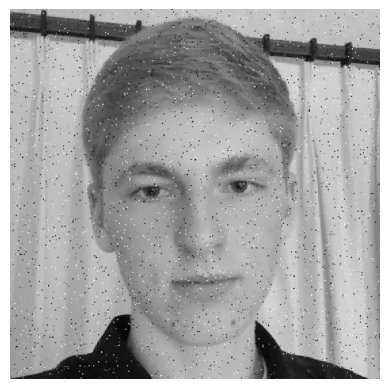

In [9]:
###############################################
# Input Image with Salt and Pepper Noise
###############################################

Jack_RGBImage = io.imread('./drive/MyDrive/Computer Vision class/img/SaltAndPepperJack.jpeg')
JackImage = color.rgb2gray(Jack_RGBImage)

print('Salt and Pepper Jack')
plt.axis('off')
plt.imshow(JackImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

Median Jack with 5 × 5 filter


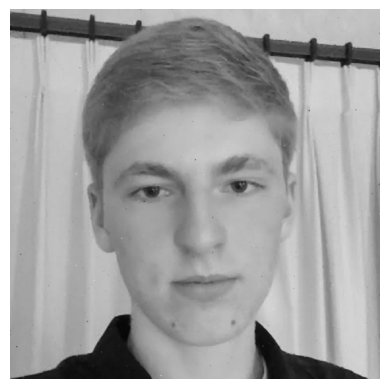

In [10]:
###############################################
# Median Filter - 5 × 5
###############################################

median_image = ndimage.median_filter(JackImage, size=5)

print('Median Jack with 5 × 5 filter')
plt.axis('off')
plt.imshow(median_image, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

Median Jack with 30 × 30 filter


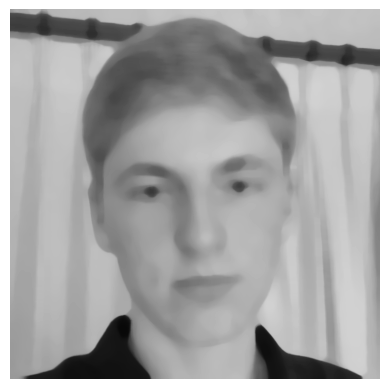

In [11]:
###############################################
# Median Filter - 30 × 30
##############################################

median_image2 = ndimage.median_filter(JackImage, size=30)

print('Median Jack with 30 × 30 filter')
plt.axis('off')
plt.imshow(median_image2, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

## 3-2. Mean Filter vs Median Filter

Mean Jack with 5 ᳵ 5 filter


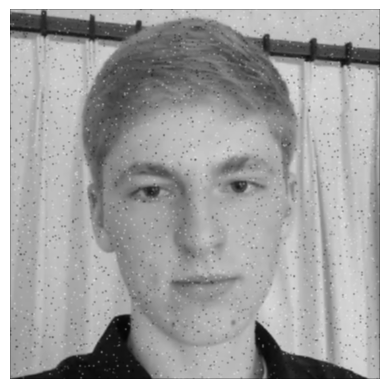

In [12]:
###############################################
# Mean Filter = 5 ᳵ 5 Box Filter
###############################################

mean_filter = (1/25) * np.array((
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1]),
        dtype="float")

mean_image = convolve2d(JackImage, mean_filter, 'same')
print('Mean Jack with 5 ᳵ 5 filter')
plt.axis('off')
plt.imshow(mean_image, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

Mean Jack with 30 ᳵ 30 filter


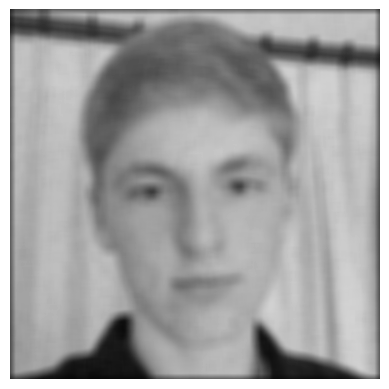

In [13]:
###############################################
# Mean Filter = 30 ᳵ 30 Box Filter
###############################################

mean_filter2 = (1/900) * np.ones((30,30), dtype="float")

mean_image2 = convolve2d(JackImage, mean_filter2, 'same')
print('Mean Jack with 30 ᳵ 30 filter')
plt.axis('off')
plt.imshow(mean_image2, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

# 4. Template Matching
- Template matching can be used as a pipeline in conducting object detection for machine learning models and deep learning models

In [14]:
# finding Max Point
def findMaxPos(x) :
  maxindex = x.argmax()
  maxpos = np.unravel_index(maxindex, x.shape)
  return maxpos

Face Image : Template


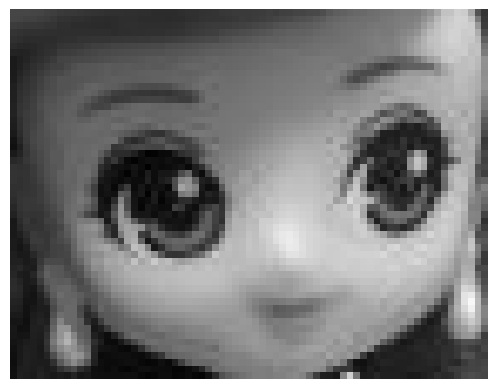

In [15]:
# cropping face part
Face = GrayImage[73:128, 81:152]

print("Face Image : Template")
plt.axis('off')
plt.imshow(Face, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

##4-1. without zero centered
- incorrect result
<br>∵ as brightness in Image increases, the response in result will increase, as long as filter is positive</br>

Correlation Result without zero centering


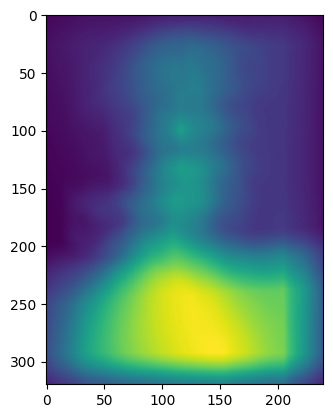

Max position = (292, 147)



In [16]:
###############################################
# Correlate without zero centered Image
###############################################
output_corr = correlate2d(GrayImage, Face, mode='same')

print('Correlation Result without zero centering')
plt.imshow(output_corr)
plt.show()
print(f'Max position = {findMaxPos(output_corr)}\n')

##4-2. with zero centered
- zero centered Image and Filter
- closer result! but not perfectly correct
<br>∵ score is higher only when dark parts match and when light parts match</br>

Correlation Result zero centering


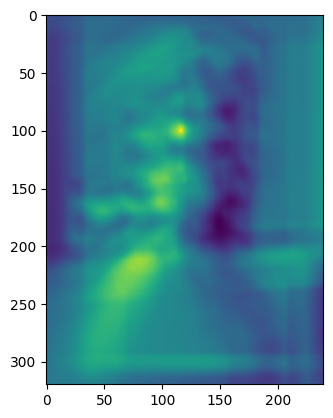

Max position = (100, 116)

Correlation Result after Face's normalization


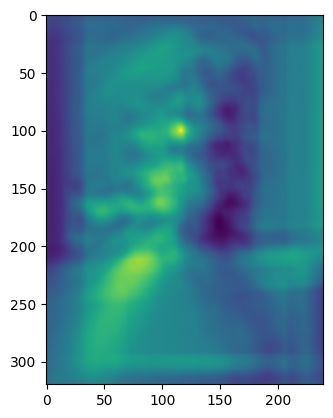

Max position = (100, 116)



In [17]:
###############################################
# zero centered Filter & zero centered Image
###############################################
GrayImage2 = GrayImage - GrayImage.mean()
Face2 = Face - Face.mean()

output_corr2 = correlate2d(GrayImage2, Face2, mode='same')

print('Correlation Result zero centering')
plt.imshow(output_corr2)
plt.show()
print(f'Max position = {findMaxPos(output_corr2)}\n')

###############################################
# normalize only with average value of Filter
###############################################
GrayImage3 = GrayImage - Face.mean()
Face3 = Face - Face.mean()

output_corr3 = correlate2d(GrayImage3, Face3, mode='same')

print('Correlation Result after Face\'s normalization')
plt.imshow(output_corr3)
plt.show()
print(f'Max position = {findMaxPos(output_corr3)}\n')